# DMS Data

In [1]:
import xarray as xr
import s3fs
import matplotlib.pyplot as plt
import pandas as pd

import cartopy.crs as ccrs

s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0", client_kwargs=dict(endpoint_url="https://rgw.met.no"))


In [2]:
s3.ls('escience2022/Antoine/Satellite_Arctic_DMS')

['escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2003_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2004_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2005_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2006_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2007_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2008_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2009_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2010_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2011_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2012_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2013_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2014_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2015_8D_28km.nc',
 'escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2016_8D_28km.nc',
 'esci

In [3]:
s3file = 's3://escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A2015_8D_28km.nc'
file = s3.open(s3file)
dsorig = xr.open_dataset(file)
dsorig

<xarray.Dataset>
Dimensions:      (pixel: 96668, year: 1, period: 46)
Coordinates:
  * year         (year) float64 2.015e+03
Dimensions without coordinates: pixel, period
Data variables:
    longitude    (pixel) float64 ...
    latitude     (pixel) float64 ...
    startjulday  (period) float64 ...
    endjulday    (period) float64 ...
    dms          (period, year, pixel) float64 ...

In [4]:
ds=dsorig.assign_coords({
    "pixel": pd.MultiIndex.from_arrays([dsorig.latitude.values, dsorig.longitude.values.round()],names=["lat", "lon"])
                        }).unstack("pixel")
ds

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 361, year: 1, period: 46)
Coordinates:
  * lat          (lat) float64 45.12 45.38 45.62 45.88 ... 89.38 89.62 89.88
  * lon          (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
  * year         (year) float64 2.015e+03
Dimensions without coordinates: period
Data variables:
    longitude    (lat, lon) float64 -179.8 -178.8 -177.7 -176.6 ... nan nan nan
    latitude     (lat, lon) float64 45.12 45.12 45.12 45.12 ... nan nan nan nan
    startjulday  (period) float64 1.0 9.0 17.0 25.0 ... 337.0 345.0 353.0 361.0
    endjulday    (period) float64 8.0 16.0 24.0 32.0 ... 344.0 352.0 360.0 365.0
    dms          (period, year, lat, lon) float64 0.5345 0.2122 ... nan nan

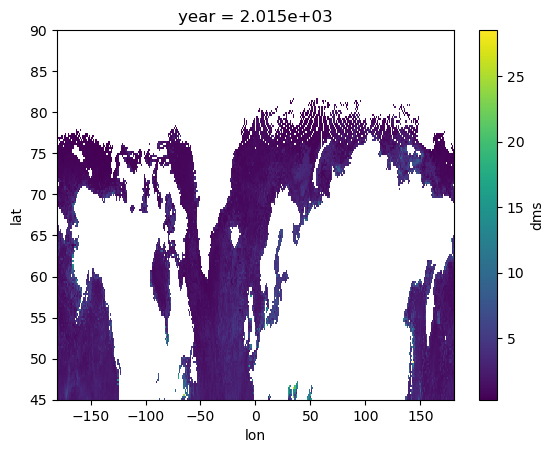

In [5]:
ds.dms.isel(period=30,year=0).plot()

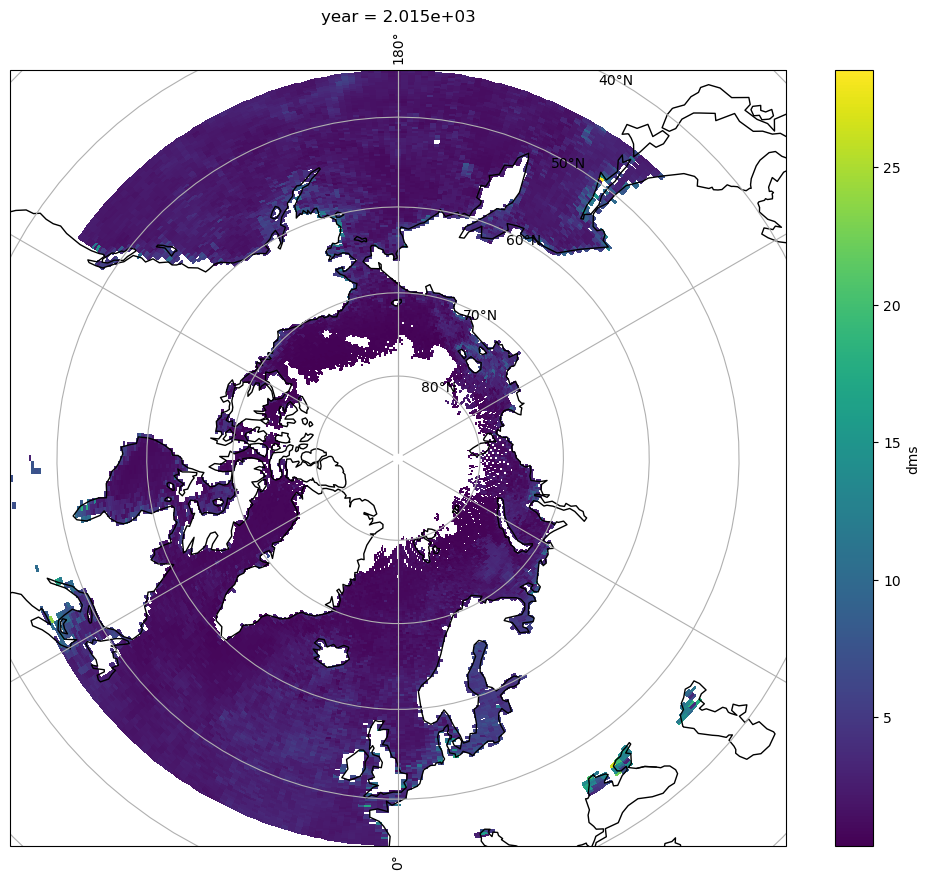

In [6]:
fig, ax = plt.subplots(figsize=(10,10),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ds.dms.isel(period=30,year=0).plot.pcolormesh(
    ax = ax,
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8},
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax.gridlines(draw_labels=True)
ax.coastlines()
fig.tight_layout()
